In [1]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import numpy as np
#import time
import matplotlib.pyplot as plt

In [2]:
input_shape = (28, 28, 1)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Convertir el formato de las imágenes a (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Y_trainB = to_categorical(Y_train, num_classes = 10)
Y_testB = to_categorical (Y_test, num_classes = 10)

for i in range(X_train.shape[0]):
    X_train[i] = (X_train[i]-X_train[i].mean())/X_train[i].std()

for i in range(X_test.shape[0]):
    X_test[i] = (X_test[i]-X_test[i].mean())/X_test[i].std()


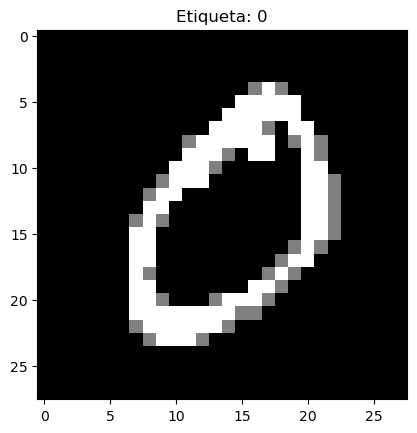

In [3]:
indice_imagen=1
imagen = X_train[indice_imagen]
etiqueta = Y_train[indice_imagen]
plt.imshow(imagen, cmap='gray')
plt.title(f'Etiqueta: {etiqueta}')
plt.show()

In [4]:
# --- hiperparámetros ---
F = 4   #-- cantidad de filtros o de mapas de características --
K = 3   #-- tamaño del kernel o máscara ---
S = 1   #-- stride ---
P = 1   #-- padding ---
FUN = "relu"   #-- función de activación de la capa de convolucion --
PS = 2  #-- tamaño para la ventana de pooling  --

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(PS,PS)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
LOTES = 250
EPOCAS  = 4000

# entrena el modelo y guarda la historia del progreso
es = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001)
#ini = time.time()
H = model.fit(x = X_train, y = Y_trainB, batch_size = LOTES, validation_data = (X_test, Y_testB),
              epochs=EPOCAS, callbacks=[es])

# H = model.fit(x = X_train, y = Y_train, batch_size = LOTES, epochs = EPOCAS, validation_data = (X_test, Y_test))

print("Epocas = %d" % es.stopped_epoch)
#fin = time.time()
#print("duracion = %.5f seg." % (fin-ini))


Epoch 1/4000
240/240 [==============================] - 7s 28ms/step - loss: 1.1272 - accuracy: 0.6557 - val_loss: 0.4788 - val_accuracy: 0.8620
Epoch 2/4000
240/240 [==============================] - 6s 25ms/step - loss: 0.4292 - accuracy: 0.8756 - val_loss: 0.3686 - val_accuracy: 0.8974
Epoch 3/4000
240/240 [==============================] - 6s 26ms/step - loss: 0.3730 - accuracy: 0.8918 - val_loss: 0.3398 - val_accuracy: 0.9042
Epoch 4/4000
240/240 [==============================] - 6s 26ms/step - loss: 0.3494 - accuracy: 0.8990 - val_loss: 0.3234 - val_accuracy: 0.9078
Epoch 5/4000
240/240 [==============================] - 6s 26ms/step - loss: 0.3355 - accuracy: 0.9041 - val_loss: 0.3115 - val_accuracy: 0.9107
Epoch 6/4000
240/240 [==============================] - 6s 26ms/step - loss: 0.3252 - accuracy: 0.9071 - val_loss: 0.3032 - val_accuracy: 0.9136
Epoch 7/4000
240/240 [==============================] - 6s 25ms/step - loss: 0.3166 - accuracy: 0.9091 - val_loss: 0.2980 - val_ac

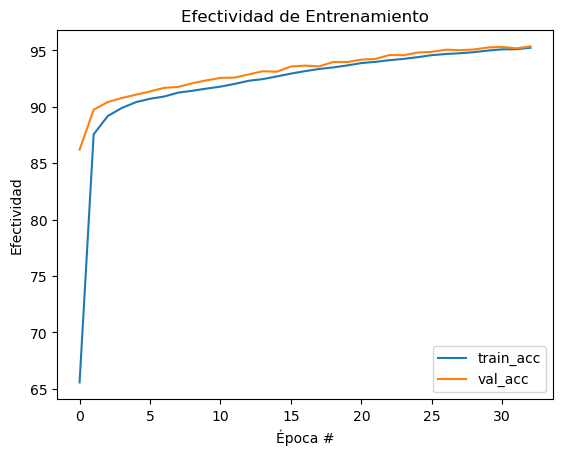

In [7]:
# accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

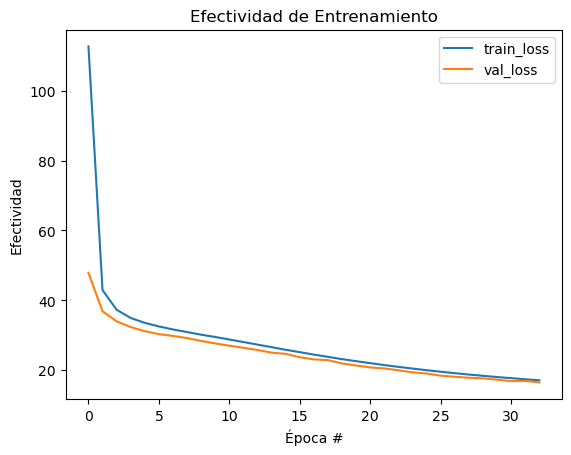

In [8]:
accuracy = np.array(H.history["loss"])
val_accuracy = np.array(H.history["val_loss"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_loss")
plt.plot(N, 100*val_accuracy, label="val_loss")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="upper right")

In [9]:
# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_testB, batch_size = LOTES)

print("\nEfectividad del modelo con datos de validación: %6.2f%%" % (pred[1]*100))

40/40 [==============================] - 0s 11ms/step - loss: 0.1649 - accuracy: 0.9535

Efectividad del modelo con datos de validación:  95.35%


In [10]:
from sklearn import preprocessing, metrics, model_selection

#----- TRAIN -----
Y_predB = model.predict(X_train)
Y_pred = np.argmax(Y_predB,axis=1)

report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report)

MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

1875/1875 [==============================] - 6s 3ms/step
Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5923
           1       0.97      0.98      0.98      6742
           2       0.95      0.93      0.94      5958
           3       0.94      0.95      0.94      6131
           4       0.95      0.96      0.96      5842
           5       0.95      0.95      0.95      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.95      6265
           8       0.94      0.92      0.93      5851
           9       0.94      0.93      0.94      5949

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000

Confusion matrix:
[[5785    1   13   10   15   19   42    7   25    6]
 [   3 6625   27   17   18    4    6   11   27    4]
 [  22   40 5529   61   52   10  

In [11]:
# -- TESTING ---
Y_predB = model.predict(X_test)
Y_pred = np.argmax(Y_predB,axis=1)

print("%% aciertos X_test : %.3f\n" % metrics.accuracy_score(Y_test,Y_pred))

report = metrics.classification_report(Y_test, Y_pred)
print("Confusion matrix Test:\n%s" % report)

MM = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n%s" % MM)

313/313 [==============================] - 1s 2ms/step
% aciertos X_test : 0.954

Confusion matrix Test:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.94      1032
           3       0.93      0.96      0.95      1010
           4       0.96      0.97      0.96       982
           5       0.95      0.94      0.94       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion matrix:
[[ 964    0    2    1    0    1    5    3    3    1]
 [   0 1121    2    3    0    2    3    1    3    0]
 [   7    6 